In [1]:
from google.colab import files
uploaded = files.upload()  # Upload your .jpg images here


Saving aakash.jfif to aakash.jfif
Saving all_named.jpg to all_named.jpg
Saving tanu.jfif to tanu.jfif


In [3]:
!pip install -q face_recognition opencv-python matplotlib

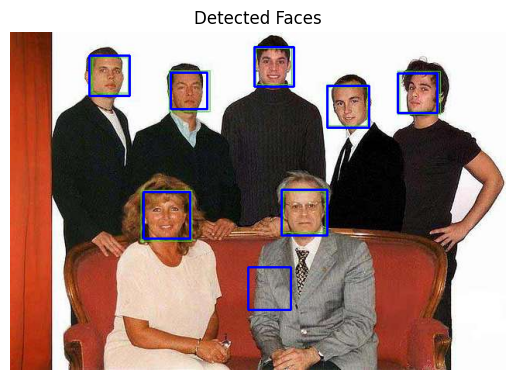

In [7]:
import cv2
import os
import matplotlib.pyplot as plt

# Load Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load image
image_path = '/content/all_named.jpg'  # Change this to your uploaded image
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Draw rectangles around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Display result
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Detected Faces")
plt.show()


The error `ModuleNotFoundError: No module named 'streamlit'` indicates that the `streamlit` library, which is used to create web applications, is not installed. The following cell will install it.

✅ 8 face(s) detected.
💾 Saved: face_1_20250709_162122.jpg
💾 Saved: face_2_20250709_162122.jpg
💾 Saved: face_3_20250709_162122.jpg
💾 Saved: face_4_20250709_162122.jpg
💾 Saved: face_5_20250709_162122.jpg
💾 Saved: face_6_20250709_162122.jpg
💾 Saved: face_7_20250709_162122.jpg
💾 Saved: face_8_20250709_162122.jpg


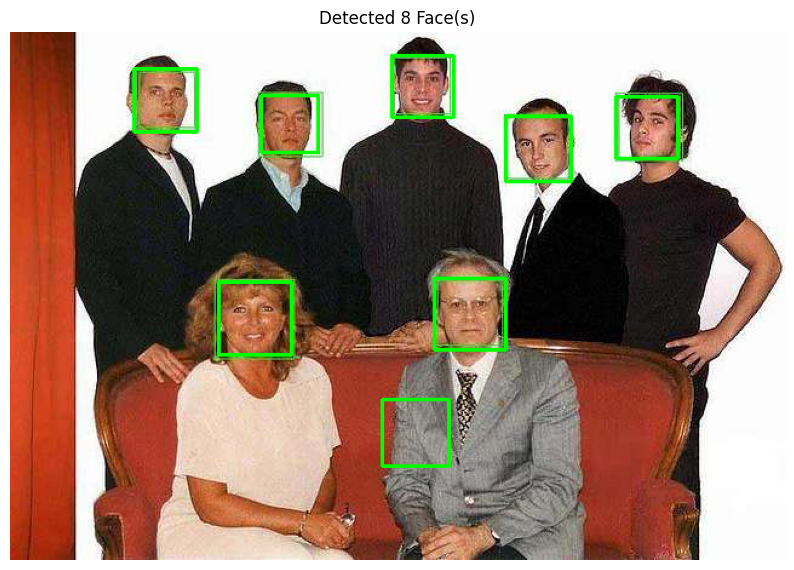

In [10]:
# ================================
# 🔍 Advanced Face Detection Script
# ================================

import cv2
import os
import matplotlib.pyplot as plt
from datetime import datetime

# 🔹 Step 1: Setup paths
image_path = '/content/all_named.jpg'  # 🔁 Replace with your image path
output_faces_dir = '/content/detected_faces'  # Folder to save cropped faces

# 🔹 Step 2: Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# 🔹 Step 3: Load and validate image
img = cv2.imread(image_path)
if img is None:
    raise ValueError(f"❌ Failed to load image at: {image_path}")

# 🔹 Step 4: Convert image to grayscale for face detection
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 🔹 Step 5: Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)
print(f"✅ {len(faces)} face(s) detected.")

# 🔹 Step 6: Create folder to save cropped face images
os.makedirs(output_faces_dir, exist_ok=True)

# 🔹 Step 7: Draw rectangles and save each detected face
for idx, (x, y, w, h) in enumerate(faces):
    # Draw bounding box
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Crop and save the face
    face_crop = img[y:y + h, x:x + w]
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    face_filename = f"face_{idx + 1}_{timestamp}.jpg"
    cv2.imwrite(os.path.join(output_faces_dir, face_filename), face_crop)
    print(f"💾 Saved: {face_filename}")

# 🔹 Step 8: Display image with bounding boxes
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f"Detected {len(faces)} Face(s)")
plt.show()
